# IIR Filter Testing

In [1]:
import pyda.dsp.spectral
from pyda.dsp.filter import IIR
from pyda import *
from pyda.dsp.spectral import psd, logpsd, tfe

from IPython.display import display, clear_output, update_display

import scipy
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 24,
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'errorbar.capsize': 0,
          'text.usetex': False}
pylab.rcParams.update(params)
# plt.style.use('ggplot')

In [2]:
print(pylab.rcParams.values())


ValuesView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 

## Generate lowpass and highpass filters

In [3]:
lp = IIR.lowpass(fc=0.1, gain=2, fs=10, order=2, iunits='V', ounits='m')
hp = IIR.highpass(fc=0.1, gain=3, fs=10, order=2, iunits='V', ounits='m')

print(lp)
print(hp)


-------- IIR ---------
   name: lowpass
      a: [ 1.         -1.91119707  0.91497583] ...
      b: [0.00188938 0.00377877 0.00188938] ...
     fs: 10
  ntaps: 3
 iunits: [V]
 ounits: [m]

-----------------------------
-------- IIR ---------
   name: highpass
      a: [ 1.         -1.91119707  0.91497583] ...
      b: [ 2.86962968 -5.73925935  2.86962968] ...
     fs: 10
  ntaps: 3
 iunits: [V]
 ounits: [m]

-----------------------------


## Compute response

In [4]:
## Compute response

r_lp = lp.resp(f1=1e-3, f2=5, nf=1000)
r_hp = hp.resp(f1=1e-3, f2=5, nf=1000)

print(r_lp)
print(r_hp)


-------- FSData ---------
  name: resp(lowpass)
  uuid: 02ce29d8-2a45-4436-94e6-469075f8e50c
     x: Frequency=(1000,)[Hz]
     y: Amplitude=(1000,)[m][V^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(1,)[m][V^(-1)]

-----------------------------
-------- FSData ---------
  name: resp(highpass)
  uuid: 20c0d348-6a73-4301-9562-912c0c4f90fc
     x: Frequency=(1000,)[Hz]
     y: Amplitude=(1000,)[m][V^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(1,)[m][V^(-1)]

-----------------------------


## Plot Responses

plotting complex data...


(0.01, 4)

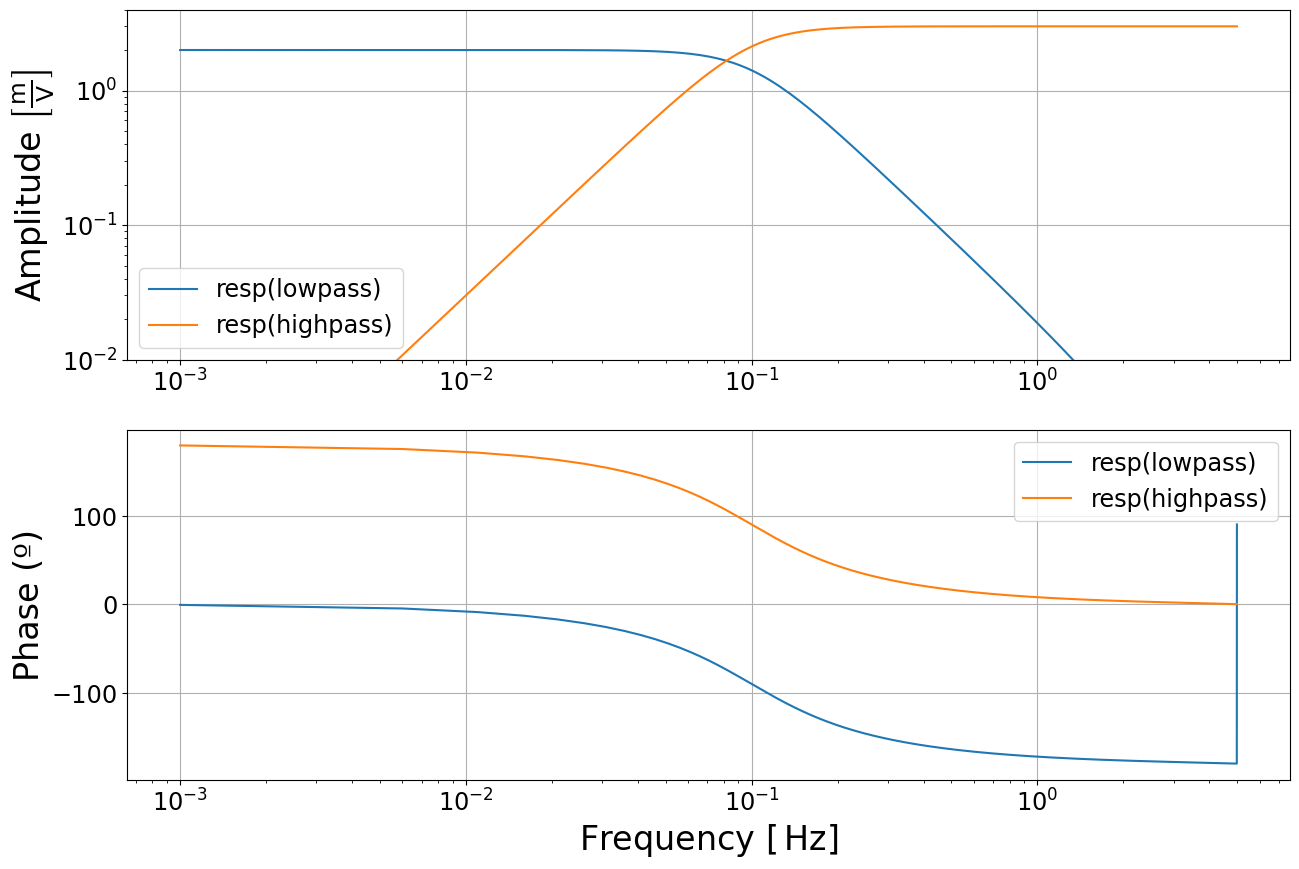

In [5]:
h = r_lp.loglog(r_hp)
axes = h[1]
axes[0].set_ylim(1e-2, 4)

## Filter Data

In [6]:
ts = TSData.randn(nsecs=1000, fs=10, name='ts', yunits='N')

lts = lp.filter(ts)
hts = hp.filter(ts)

print(lts)

-------- TSData ---------
  name: lowpass(ts)
  uuid: 84eb018d-76d9-4ac2-aae8-a5dbca9fe7e3
    fs: 10.0
 nsecs: 1000.0000000000001
 xaxis: Time=(10000,)[s]
 yaxis: Amplitude=(10000,)[N][m][V^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[N][m][V^(-1)]

-----------------------------


## Compute Spectra

In [7]:
S_ts  = psd(ts=ts, navs=60)
S_lts = psd(ts=lts, navs=60)
S_hts = psd(ts=hts, navs=60)


Processing PSD with segments of length 327 and overlap of 163.0 samples (50%)
<class 'pyda.utils.unit.Unit'>
Processing PSD with segments of length 327 and overlap of 163.0 samples (50%)
<class 'pyda.utils.unit.Unit'>
Processing PSD with segments of length 327 and overlap of 163.0 samples (50%)
<class 'pyda.utils.unit.Unit'>


(0.01, 30)

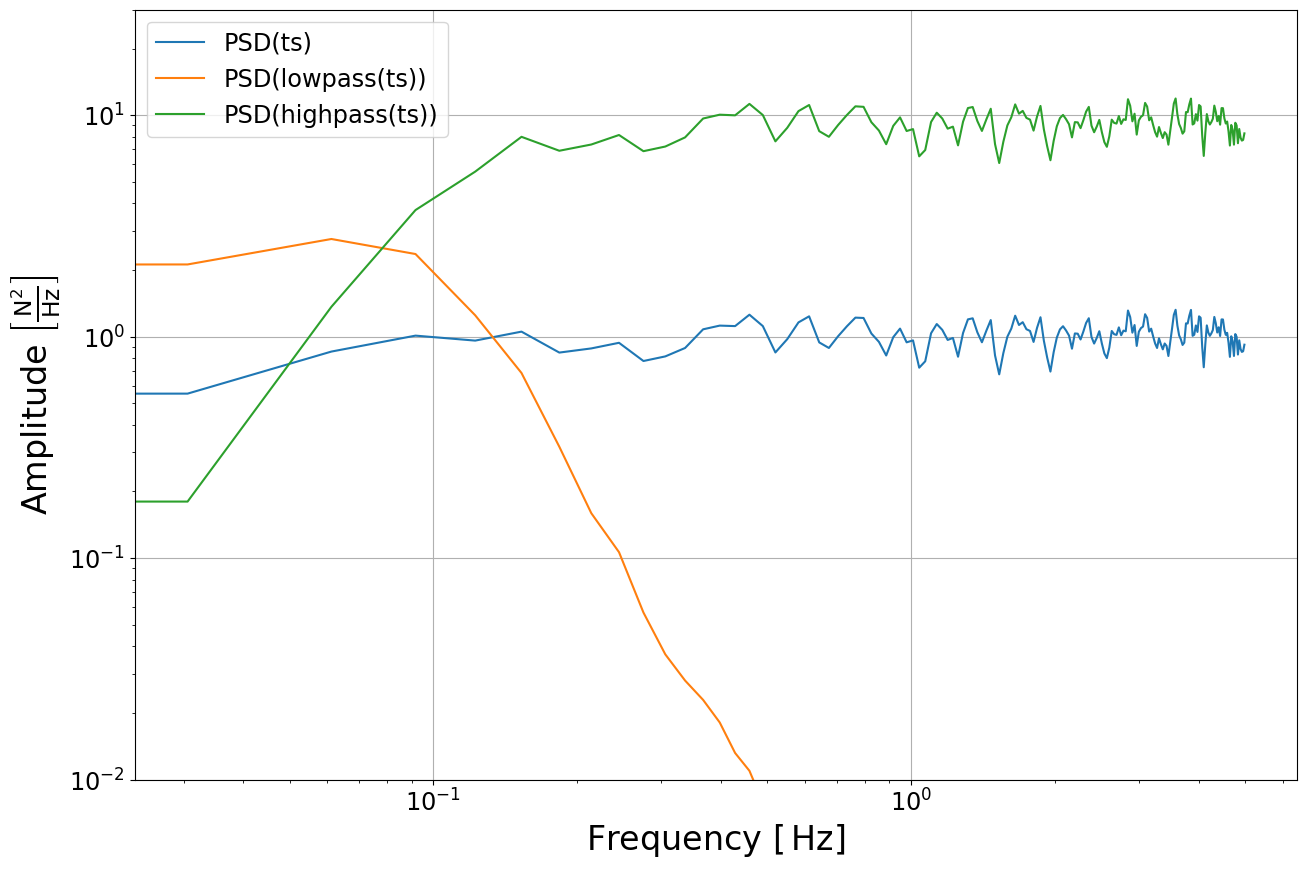

In [8]:
h = S_ts.loglog(S_lts, S_hts)

fh = h[0]
axes = h[1]
axes[0].set_ylim(1e-2, 30)


## Generate bandpass and bandstop filters

In [9]:
bp = IIR.bandpass(gain = 2, fs = 10, fc=[0.01, 0.1], order=3, iunits='V', ounits='m')
bs = IIR.bandstop(gain = 2, fs = 10, fc=[0.01, 0.1], order=3, iunits='V', ounits='m')
print(bp)

-------- IIR ---------
   name: bandpass
      a: [  1.          -5.88575539  14.4363301  -18.88750539  13.9020923
  -5.45821188   0.89305026] ...
      b: [ 4.27555354e-05  0.00000000e+00 -1.28266606e-04  0.00000000e+00
  1.28266606e-04  0.00000000e+00 -4.27555354e-05] ...
     fs: 10
  ntaps: 7
 iunits: [V]
 ounits: [m]

-----------------------------


## Plot response

plotting complex data...


(0.01, 10)

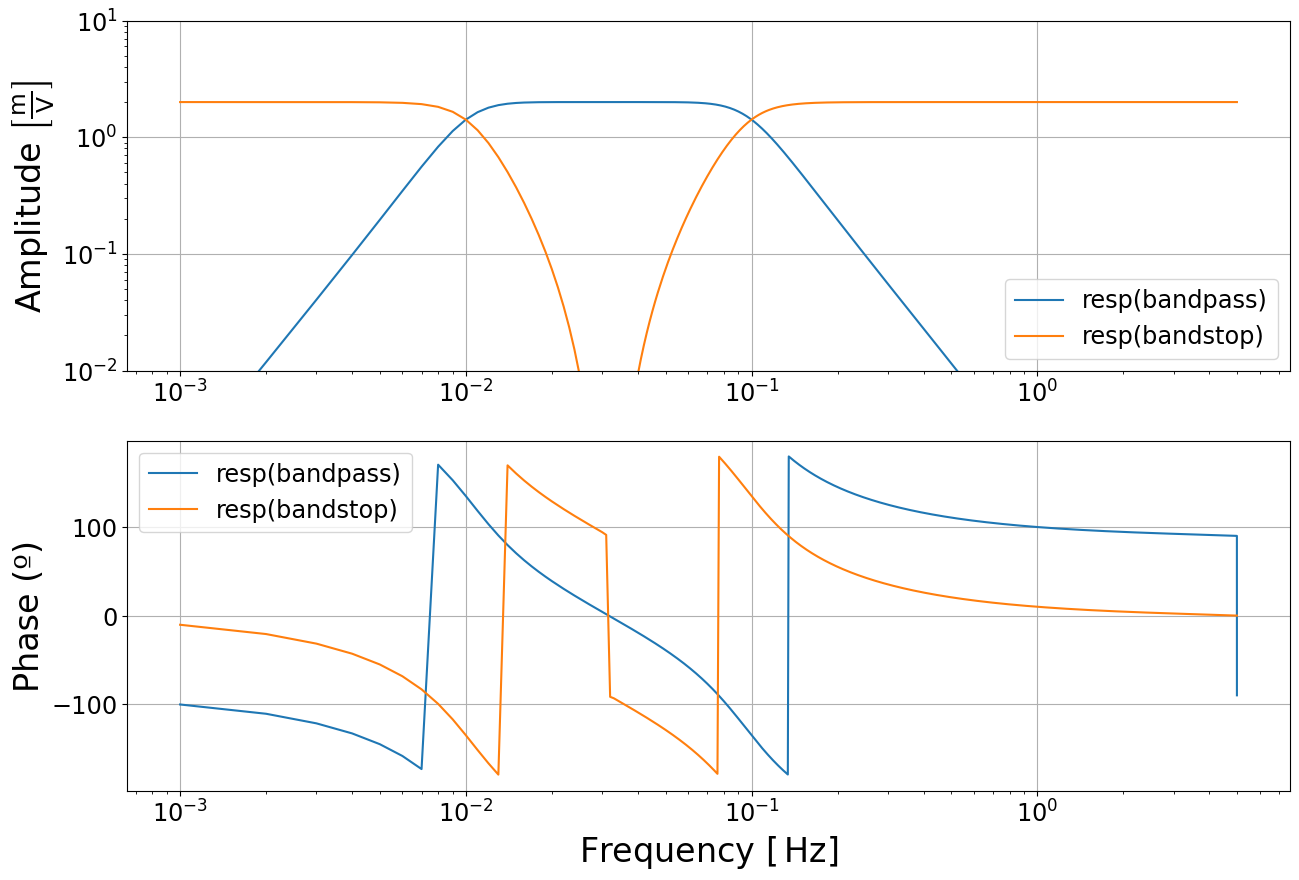

In [10]:
r_bp = bp.resp(f1=1e-3, f2=5, nf=5000)
r_bs = bs.resp(f1=1e-3, f2=5, nf=5000)
h = r_bp.loglog(r_bs)
fh = h[0]
axes = h[1]
axes[0].set_ylim(1e-2, 10)

## Filter data

In [11]:
ts = TSData.randn(nsecs=10000, fs=10, name='ts', yunits='N')

# normal filter
pts = bp.filter(ts)
sts = bs.filter(ts)

# double pass
pts2 = bp.filtfilt(ts)
sts2 = bs.filtfilt(ts)

print(pts)

-------- TSData ---------
  name: bandpass(ts)
  uuid: 1062be7c-17bd-47a9-83ba-aebfc443196c
    fs: 10.0
 nsecs: 10000.000000000002
 xaxis: Time=(100000,)[s]
 yaxis: Amplitude=(100000,)[N][m][V^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[N][m][V^(-1)]

-----------------------------


## Compute spectra

In [12]:
lS_ts = logpsd(ts=ts)
lS_pts = logpsd(ts=pts)
lS_sts = logpsd(ts=sts)
lS_pts2 = logpsd(ts=pts2)
lS_sts2 = logpsd(ts=sts2)



* computing lpsd of ts ...
* computing lpsd of bandpass(ts) ...
* computing lpsd of bandstop(ts) ...
* computing lpsd of bandpass(ts) ...
* computing lpsd of bandstop(ts) ...


In [13]:
print(lS_ts)
print(lS_pts)
print(lS_sts)
print(lS_pts2)
print(lS_sts2)


-------- FSData ---------
  name: LPSD(ts)
  uuid: fdd634c6-216e-4496-9be0-fa8c40744068
     x: Frequency=(403,)[Hz]
     y: Amplitude=(403,)[N^(2)][Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(403,)[N^(2)][Hz^(-1)]

-----------------------------
-------- FSData ---------
  name: LPSD(bandpass(ts))
  uuid: e1987bce-9322-44ca-934f-1ba45e398449
     x: Frequency=(403,)[Hz]
     y: Amplitude=(403,)[N^(2)][m^(2)][V^(-2)][Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(403,)[N^(2)][m^(2)][V^(-2)][Hz^(-1)]

-----------------------------
-------- FSData ---------
  name: LPSD(bandstop(ts))
  uuid: 2c85b172-8ac2-4c31-8047-4cdfcb933650
     x: Frequency=(403,)[Hz]
     y: Amplitude=(403,)[N^(2)][m^(2)][V^(-2)][Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(403,)[N^(2)][m^(2)][V^(-2)][Hz^(-1)]

-----------------------------
-------- FSData ---------
  name: LPSD(bandpass(ts))
  uuid: b316b73b-a09c-48a2-b81f-7005d4b7bd05
     x: Frequency=(403,)[Hz]
     y: Amplitude=(403

## Plot spectra

[<Figure size 1500x1000 with 1 Axes>, [<Axes: xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{N}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>], [<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>]]


/Users/martin.hewitson/miniforge3/envs/pyperf_new_structure/lib/python3.8/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


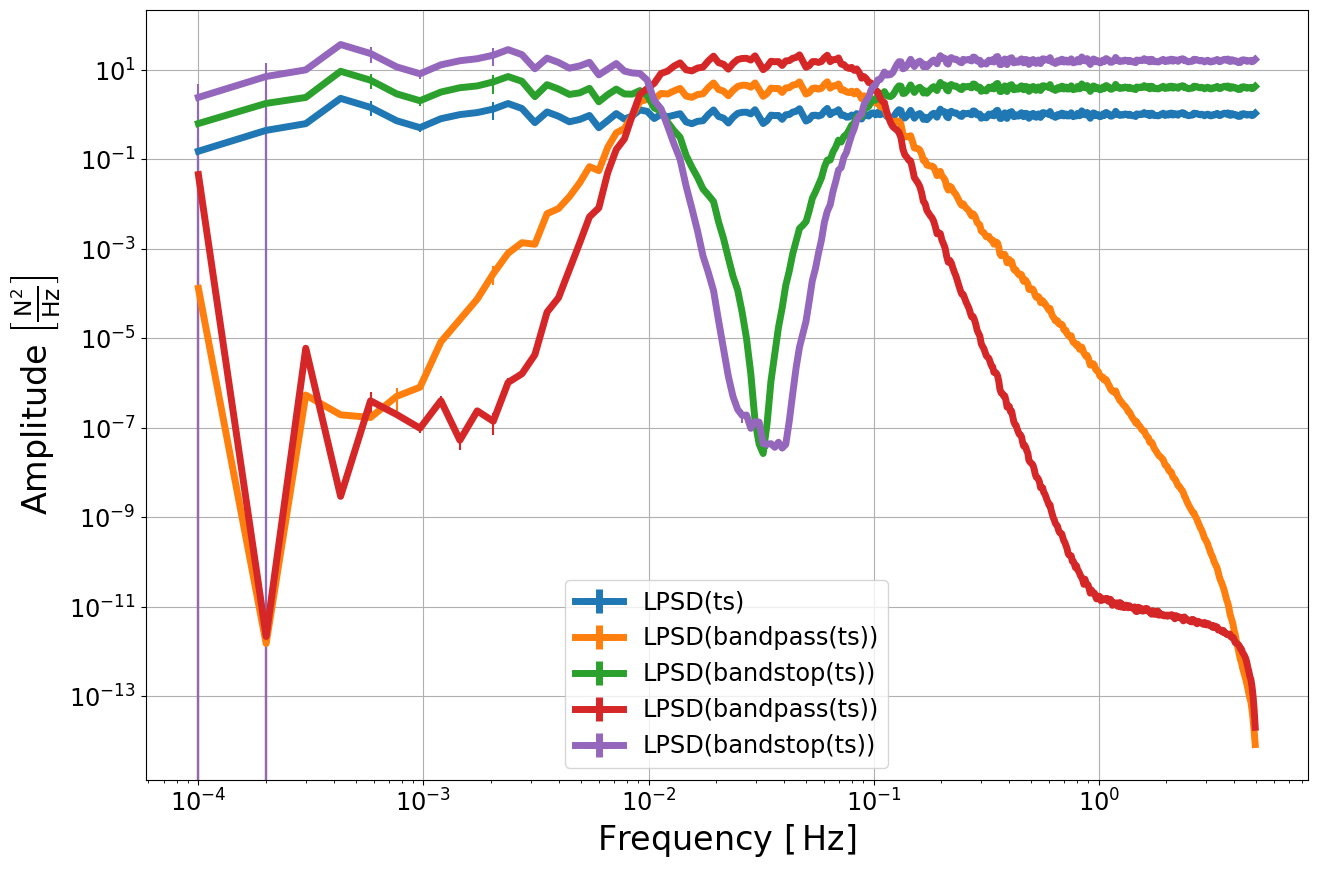

In [14]:

h = lS_ts.loglog(lS_pts, lS_sts, lS_pts2, lS_sts2, ShowErrors=True)

print(h)

# manipulate plot (needs to happen in this cell!)
fh = h[0] # figure handle
ah = h[1] # axis handles
eb = h[2] # errorbar container handles

for dl,cl,bl in eb:
    dl.set_linewidth(5)

    bl[0].set_linewidth(5)

plt.legend() # update legend


## Compute TF estimate

Processing PSD with segments of length 40000 and overlap of 20000.0 samples (50%)
plotting complex data...


ValueError: 'yerr' must not contain negative values

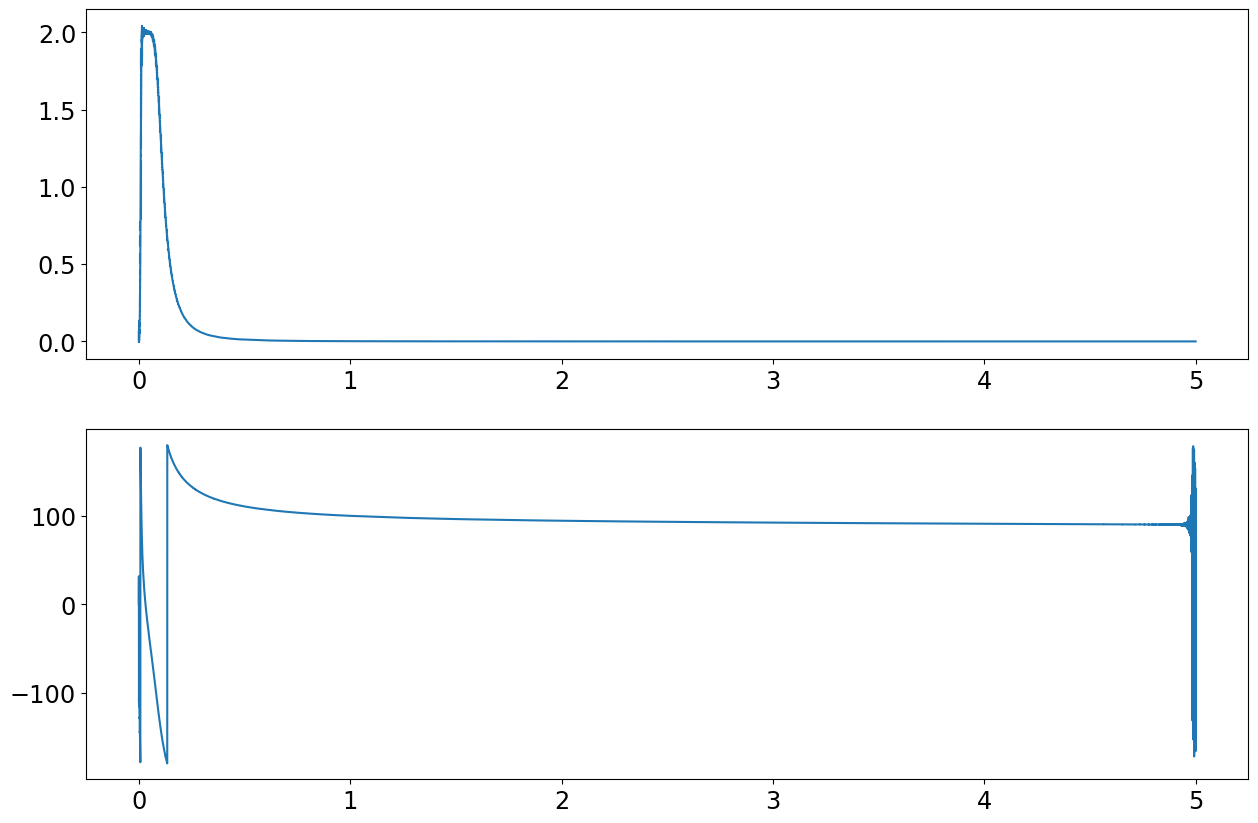

In [15]:


T1 = tfe(ts, pts, navs=4)

h = T1.loglog(ShowErrors=True)

In [ ]:
# Plot linear
h = T1.plot(ShowErrors=True)


In [ ]:
print(T1)
h = T1.semilogx(ShowErrors=True)

In [ ]:
h = T1.semilogy(ShowErrors=True)